In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
from matplotlib import transforms, pyplot as plt
%matplotlib inline

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.linewidth'] = 0.5
GRAY4, GRAY7 = '#646369', '#929497'

## Data Preparation

In [13]:
df = pd.read_csv("~/Desktop/lowHigh.csv")
ar = df.values
arT = ar.T
toBeDelete = []
for i in range(2,arT.shape[0]):
    tmp = arT[i]
    count = 0
    for j in range(arT.shape[1]):
        if tmp[j] < 1e-6:
            count = count + 1
    if count > (arT.shape[1]-2):
        print(i, count)
        toBeDelete.append(i)
df.drop(df.columns[toBeDelete], axis=1, inplace=True)

2 48
23 48
24 47
25 48
26 48
40 47
45 48
65 47
68 48
69 48
71 47
75 48


In [14]:
df['Risk'] = pd.get_dummies(df['Risk'])['Low-risk']
features = df.columns.values.tolist()
features.remove('Risk')
features.remove('Sample Name')
target = 'Risk'
df[features + [target]]

,GSSG,8-OH-dG,GSH,L-Leucine,L-Kynurenine,L-Tryptophan,5-HTP,Cholic acid,N-phenylacetylglycine,5-HT,...,PE(36:4),glutamine,betaine,histidine,methionine,pyroglutamic acid,benzene acetyl glycine,N6-acetyl lysine,nicotinamide,Risk
0,0.00000,0.6380,0.01150,282.0,0.539,11.70,0.02760,0.00000,0.2270,0.475,...,2.64,0.01840,67.6,0.03370,0.000000,0.00,0.000,10.50,0.07820,1
1,0.00000,0.2440,0.01670,485.0,1.060,14.50,0.02680,0.02270,0.2130,0.582,...,3.78,0.02340,101.0,0.09850,0.000000,0.00,0.000,13.40,0.01340,1
2,0.00436,0.5350,0.00427,256.0,0.894,7.78,0.01310,0.00990,0.2990,0.600,...,2.79,0.01740,86.5,0.03600,0.000000,0.00,0.000,12.30,0.00899,1
3,0.00000,0.2440,0.00477,356.0,0.529,12.40,0.01700,0.00000,0.2850,0.767,...,2.88,0.00487,59.2,0.04990,0.000000,0.00,0.000,10.80,0.00000,1
4,0.00000,0.0840,0.00236,286.0,0.532,7.22,0.04490,0.00000,0.2200,0.524,...,3.07,0.00485,56.0,0.03670,0.000000,0.00,0.000,10.60,0.00000,1
5,0.00000,0.4770,0.00841,420.0,0.650,11.70,0.02240,0.02350,0.9690,0.343,...,3.46,0.01680,44.7,0.05810,0.000000,0.00,0.000,14.40,0.00000,1
6,0.00000,2.6200,0.01520,475.0,2.520,13.40,0.03420,0.00000,0.0957,0.784,...,6.36,0.08630,49.1,0.12200,0.000000,0.00,0.000,29.50,0.00000,1
7,0.00000,0.4170,0.01170,365.0,0.618,11.60,0.04530,0.00000,0.3520,0.559,...,3.51,0.02130,51.7,0.04790,0.000000,0.00,0.000,14.50,0.00000,1
8,0.00000,0.4230,0.01170,297.0,0.397,8.07,0.02100,0.00000,0.2490,0.328,...,2.84,0.02340,59.4,0.05610,0.000000,0.00,0.000,11.10,0.01510,1
9,0.00000,0.1980,0.01330,383.0,0.576,12.00,0.06650,0.00000,0.1850,1.010,...,3.38,0.00000,46.6,0.04520,0.000000,0.00,0.000,16.10,0.00000,1


In [15]:
# X, y = (df[features].apply(scipy.stats.zscore, axis=0)).values, df[target].values
X, y = df[features].values, df[target].values

In [16]:
df

,Risk,Sample Name,GSSG,8-OH-dG,GSH,L-Leucine,L-Kynurenine,L-Tryptophan,5-HTP,Cholic acid,...,Glycine49,PE(36:4),glutamine,betaine,histidine,methionine,pyroglutamic acid,benzene acetyl glycine,N6-acetyl lysine,nicotinamide
0,1,19,0.00000,0.6380,0.01150,282.0,0.539,11.70,0.02760,0.00000,...,0.02760,2.64,0.01840,67.6,0.03370,0.000000,0.00,0.000,10.50,0.07820
1,1,20,0.00000,0.2440,0.01670,485.0,1.060,14.50,0.02680,0.02270,...,0.03180,3.78,0.02340,101.0,0.09850,0.000000,0.00,0.000,13.40,0.01340
2,1,21,0.00436,0.5350,0.00427,256.0,0.894,7.78,0.01310,0.00990,...,0.02180,2.79,0.01740,86.5,0.03600,0.000000,0.00,0.000,12.30,0.00899
3,1,22,0.00000,0.2440,0.00477,356.0,0.529,12.40,0.01700,0.00000,...,0.02920,2.88,0.00487,59.2,0.04990,0.000000,0.00,0.000,10.80,0.00000
4,1,23,0.00000,0.0840,0.00236,286.0,0.532,7.22,0.04490,0.00000,...,0.04850,3.07,0.00485,56.0,0.03670,0.000000,0.00,0.000,10.60,0.00000
5,1,24,0.00000,0.4770,0.00841,420.0,0.650,11.70,0.02240,0.02350,...,0.02520,3.46,0.01680,44.7,0.05810,0.000000,0.00,0.000,14.40,0.00000
6,1,25,0.00000,2.6200,0.01520,475.0,2.520,13.40,0.03420,0.00000,...,0.00000,6.36,0.08630,49.1,0.12200,0.000000,0.00,0.000,29.50,0.00000
7,1,26,0.00000,0.4170,0.01170,365.0,0.618,11.60,0.04530,0.00000,...,0.03200,3.51,0.02130,51.7,0.04790,0.000000,0.00,0.000,14.50,0.00000
8,1,27,0.00000,0.4230,0.01170,297.0,0.397,8.07,0.02100,0.00000,...,0.01400,2.84,0.02340,59.4,0.05610,0.000000,0.00,0.000,11.10,0.01510
9,1,28,0.00000,0.1980,0.01330,383.0,0.576,12.00,0.06650,0.00000,...,0.00000,3.38,0.00000,46.6,0.04520,0.000000,0.00,0.000,16.10,0.00000


In [17]:
# df[features].apply(scipy.stats.zscore, axis=0).describe()
df[features].describe()

,GSSG,8-OH-dG,GSH,L-Leucine,L-Kynurenine,L-Tryptophan,5-HTP,Cholic acid,N-phenylacetylglycine,5-HT,...,Glycine49,PE(36:4),glutamine,betaine,histidine,methionine,pyroglutamic acid,benzene acetyl glycine,N6-acetyl lysine,nicotinamide
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.00000,48.000000,48.000000,48.000000,48.000000
mean,0.000558,0.346471,0.009669,321.583333,0.731146,9.015833,0.028456,0.002699,0.145802,0.505188,...,0.013913,2.853542,0.013001,56.818750,0.035593,0.00008,1.179583,0.056062,14.127292,0.008506
std,0.001436,0.376893,0.006283,74.244803,0.361308,4.031166,0.020184,0.006219,0.159272,0.151921,...,0.012430,0.817074,0.014312,25.784282,0.028695,0.00045,2.026082,0.284848,4.238113,0.014552
min,0.000000,0.017700,0.000000,207.000000,0.341000,3.000000,0.001840,0.000000,0.000000,0.257000,...,0.000000,1.760000,0.000000,27.800000,0.000000,0.00000,0.000000,0.000000,8.520000,0.000000
25%,0.000000,0.155000,0.004815,269.000000,0.531750,6.047500,0.015175,0.000000,0.036300,0.408750,...,0.000000,2.317500,0.004803,39.900000,0.012350,0.00000,0.000000,0.000000,11.100000,0.000000
50%,0.000000,0.286000,0.009330,304.500000,0.659000,7.650000,0.021000,0.000000,0.097850,0.492000,...,0.011250,2.710000,0.009385,51.550000,0.032650,0.00000,0.000000,0.000000,13.100000,0.000000
75%,0.000000,0.420250,0.013475,363.500000,0.852250,12.075000,0.041600,0.000000,0.220250,0.579000,...,0.021425,3.310000,0.018550,64.000000,0.050900,0.00000,2.365000,0.000000,16.100000,0.015425
max,0.006020,2.620000,0.028300,485.000000,2.520000,19.600000,0.071900,0.023500,0.969000,1.010000,...,0.048500,6.360000,0.086300,183.000000,0.122000,0.00303,7.550000,1.760000,29.500000,0.078200


## Correlation Matrix describe

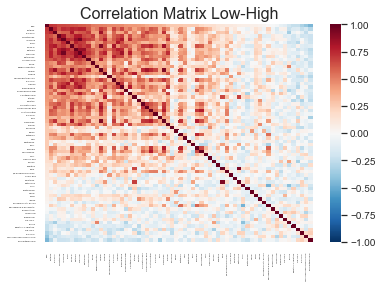

In [5]:
corr_numeric = df[features].corr().values[0]
features= np.array(features)
inds = np.argsort(-corr_numeric)
sortedfeatures = features[inds]

corr_numeric = df[sortedfeatures].corr()
sns.set(font_scale=0.2)
ax = sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r", vmin=-1, vmax=1)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
plt.title("Correlation Matrix Low-High", fontsize=16,)

plt.savefig("CorrMatLH.pdf")
plt.show() 

## Separate Train and Test Data

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[features], df[[target]], test_size=0.20, stratify=df[[target]])

print ("number of training samples: ", len(X_train))
print ("number of test samples: ", len(y_test))

number of training samples:  38
number of test samples:  10


## Decision Tree Depth Choice

In [18]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm_notebook as tqdm

In [19]:
pipe_steps = [('scaler', StandardScaler()), ('decsT', DecisionTreeClassifier())]

check_params = {'decsT__criterion':['gini', 'entropy'], 
               'decsT__max_depth': np.arange(1, 60)}

pipeline = Pipeline(pipe_steps)
print(pipeline)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('decsT',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='best'))],
         verbose=False)


In [17]:
print ("start fitting the data")
import warnings
warnings.filterwarnings("ignore")


for cv in tqdm(range(3, 15)):
    create_grid = GridSearchCV(pipeline, param_grid=check_params, cv=cv)
    create_grid.fit(X_train, y_train)
    print("score for %d fold CV := %3.2f" %(cv, create_grid.score(X_test, y_test)))
    print ("!!!! best fit parameters from GridSearchCV !!!!")
    print (create_grid.best_params_)

print ("out o' the loop")   

start fitting the data


score for 3 fold CV := 0.90
!!!! best fit parameters from GridSearchCV !!!!
{'decsT__criterion': 'gini', 'decsT__max_depth': 7}
score for 4 fold CV := 0.90
!!!! best fit parameters from GridSearchCV !!!!
{'decsT__criterion': 'gini', 'decsT__max_depth': 1}
score for 5 fold CV := 0.90
!!!! best fit parameters from GridSearchCV !!!!
{'decsT__criterion': 'gini', 'decsT__max_depth': 2}
score for 6 fold CV := 0.80
!!!! best fit parameters from GridSearchCV !!!!
{'decsT__criterion': 'gini', 'decsT__max_depth': 4}
score for 7 fold CV := 0.90
!!!! best fit parameters from GridSearchCV !!!!
{'decsT__criterion': 'gini', 'decsT__max_depth': 1}
score for 8 fold CV := 0.80
!!!! best fit parameters from GridSearchCV !!!!
{'decsT__criterion': 'gini', 'decsT__max_depth': 6}
score for 9 fold CV := 0.90
!!!! best fit parameters from GridSearchCV !!!!
{'decsT__criterion': 'gini', 'decsT__max_depth': 3}
score for 10 fold CV := 1.00
!!!! best fit parameters from GridSearchCV !!!!
{'decsT__criterion': 'gini'

## Visualize the Tree

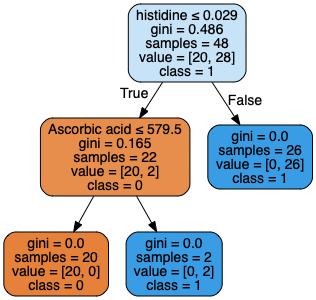

In [20]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus


DecsTree = DecisionTreeClassifier(criterion='gini', max_depth=10)
DecsTree.fit(X, y)


dot_data  = StringIO()

export_graphviz(DecsTree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features, class_names=['0','1'])


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('DecsT.png',)
# graph.set_size('"300, 180!"')
# graph.write_png('resized_tree.png')
Image(graph.create_png())

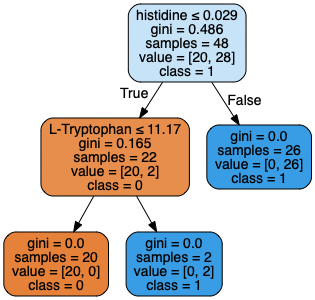

In [19]:
DecsTree = DecisionTreeClassifier(criterion='gini', max_depth=10)
DecsTree.fit(X, y)


dot_data  = StringIO()

export_graphviz(DecsTree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features, class_names=['0','1'])


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('DecsT.png',)
# graph.set_size('"300, 180!"')
# graph.write_png('resized_tree.png')
Image(graph.create_png())

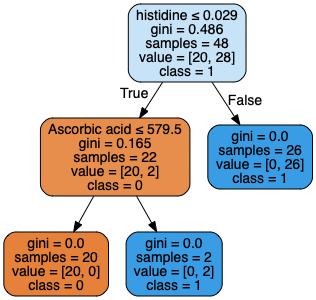

In [21]:
DecsTree = DecisionTreeClassifier(criterion='gini', max_depth=10)
DecsTree.fit(X, y)


dot_data  = StringIO()

export_graphviz(DecsTree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features, class_names=['0','1'])


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('DecsT.png',)
# graph.set_size('"300, 180!"')
# graph.write_png('resized_tree.png')
Image(graph.create_png())

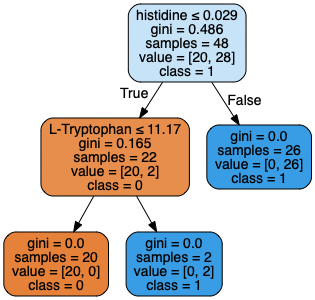

In [29]:
DecsTree = DecisionTreeClassifier(criterion='gini', max_depth=10)
DecsTree.fit(X, y)


dot_data  = StringIO()

export_graphviz(DecsTree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features, class_names=['0','1'])


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('DecsT.png',)
# graph.set_size('"300, 180!"')
# graph.write_png('resized_tree.png')
Image(graph.create_png())

## Feature Importance

score on the training data:  1.0


score on the test data:  1.0


'histidine'

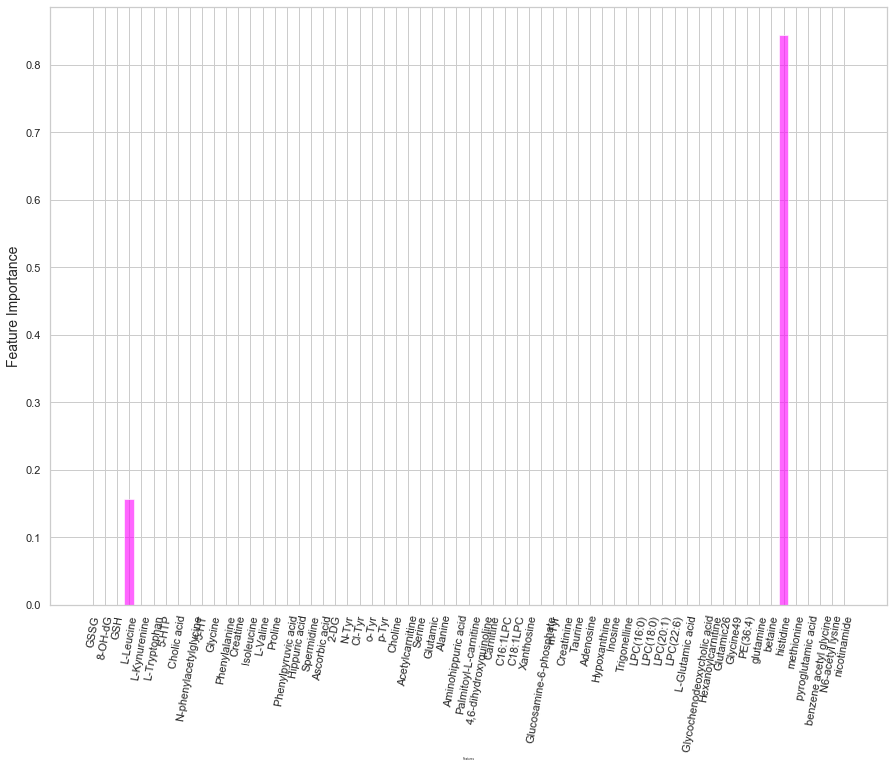

In [30]:
DecsTreeModel = DecisionTreeClassifier(criterion='gini', max_depth=6)
DecsTreeModel.fit(X, y)


train_score = DecsTreeModel.score(X_train, y_train)
print ("score on the training data: ", train_score)
print ("\n")

test_score = DecsTreeModel.score(X_test, y_test)
print ("score on the test data: ", test_score)

n_features = len(features)

sns.set(style="whitegrid")

fig = plt.figure(figsize=(15, 11))
fig.tight_layout()
plt.bar(range(n_features), DecsTreeModel.feature_importances_, color="magenta", align="center", alpha=0.6)
plt.xticks(np.arange(n_features), features, rotation=80, fontsize=11)
plt.xlabel("Features", fontsize=3)
plt.ylabel("Feature Importance", fontsize=14)
plt.savefig("Feature_Importance.png", dpi=300, bbox_inches='tight')# xticks are not clipped with 'bbox'
tmp = DecsTreeModel.feature_importances_
features[np.argmax(tmp)]